# Specific Heat

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import glob
import scipy.stats as stats
import pandas as pd

In [2]:
sns.set()

In [3]:
data_root = '../data/entropy-order-convolved/'
fig_root="../figures/"
# os.listdir(data_root)

In [45]:
M=11
m=20

classname="BA_NetworkPercolationExplosive_v7"
signature="{0}_N_*_m_{1}_M_{2}_entropy-order_*fast.txt".format(classname,m, M)

In [28]:
files=glob.glob(data_root + signature)

In [29]:
signature

'BA_NetworkPercolationExplosive_v7_N_*_m_20_M_12_entropy-order_*fast.txt'

In [30]:
files

['../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1200000_m_20_M_12_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_600000_m_20_M_12_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1000000_m_20_M_12_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_400000_m_20_M_12_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_800000_m_20_M_12_entropy-order_2019_avg.txt_convoluted_1times_fast.txt']

In [31]:
def load_exponents_from_file():
    filename = "BA_explosive_exponents"
    df = pd.read_csv(filename)
    df.index = df['M']

    tc = df['tc'][M]
    one_by_nu = df['one_by_nu'][M]
    beta_by_nu = df['beta_by_nu'][M]
    gamma_by_nu = df['gamma_by_nu'][M]
    alpha_by_nu = df['alpha_by_nu'][M]
    print(M)
    print(tc)
    print(one_by_nu)
    print(alpha_by_nu)
    print(beta_by_nu)
    print(gamma_by_nu)
    # print(df)
    return tc, one_by_nu, alpha_by_nu, beta_by_nu, gamma_by_nu

### checking ensemble size

In [32]:
print("Ensemble sizes")
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        print("N=", head['N'], "  En=", head['En'])

Ensemble sizes
N= 1200000   En= 15000
N= 600000   En= 15000
N= 1000000   En= 15000
N= 400000   En= 15000
N= 800000   En= 15000


In [33]:
def find_specific_heat(t, H, N):
#     C = -t[1:]*np.diff(H)/np.diff(t)  # noisy data
    C = -(1-t[1:])*np.diff(H)*N
#     print(1/np.diff(t)[0])
    
#     print(np.diff(t)[0])
#     print(np.diff(t)[1234])
#     print(np.diff(t)[-1])
    print(N)
    return C

def find_susceptibility(t, P, N):
    sus=np.diff(P)*N
    return sus

In [34]:
tc=0.72775

## Load data from file

In [35]:
min_limit=0.98
max_limit=1.1

In [36]:
data=dict()
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        N=int(head['N'])
        M=int(head['M'])
        m=int(head['m'])
    X = np.loadtxt(file)
    t=X[:,0]
    index=(t > min_limit) & (t < max_limit)
    data[N] = X[index]
    

1200000
600000
1000000
400000
800000


/home/shahnoor/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # Remove the CWD from sys.path while we load stuff.


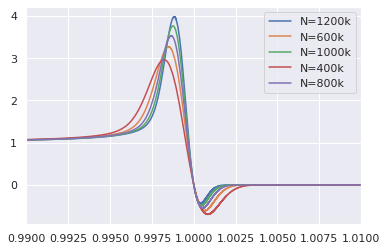

In [42]:
for N in data.keys():
#     print(data[N].shape)
    t, H, P = data[N].T
    X = find_specific_heat(t, H, N)
    plt.plot(t[1:], X, label='N={}k'.format(N//1000))
    pass
plt.legend()
# plt.xlim([0.99, 1.01])
filename=fig_root + classname + "specific_heat_m{}_M{}".format(m, M)
# plt.savefig(filename)

1200000
600000
1000000
400000
800000
[[1200000, 0.998827, 3.9861334132920914], [600000, 0.998492, 3.273054454362314], [1000000, 0.998755, 3.7689659327204392], [400000, 0.99823, 2.9672870368959825], [800000, 0.998656, 3.535694064055353]]


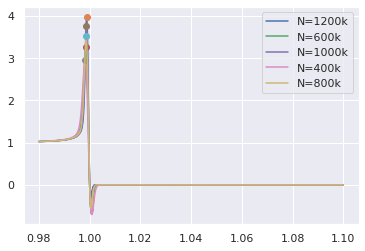

In [38]:
critical = []
for N in data.keys():
#     print(data[N].shape)
    t, H, P = data[N].T

#     sns.distplot(np.diff(t), label="N={}k".format(N//1000))
    
    X = find_specific_heat(t, H, N)
    i = np.argmax(X)
    
    critical.append([N, t[i], X[i]])
    plt.plot(t[1:], X, label='N={}k'.format(N//1000))
    plt.plot(t[i], X[i], 'o')
    
    pass
plt.legend()
# plt.xlim([0.723, 0.735])
print(critical)

In [39]:
def find_exponent(X):
    X=np.array(X)
    print(X.shape)
    plt.plot(np.log(X[:,0]), np.log(X[:,2]), 'o')
    regress = stats.linregress(np.log(X[:,0]), np.log(X[:,2]))
    print(regress)
    y = regress[0] * np.log(X[:,0]) + regress[1]
    plt.plot(np.log(X[:,0]), y)
    return regress

(5, 3)
LinregressResult(slope=0.26804316192742955, intercept=-2.375278226137151, rvalue=0.9988839410792282, pvalue=4.474987474964701e-05, stderr=0.0073175622387503915)
alpha/nu =  0.26804316192742955


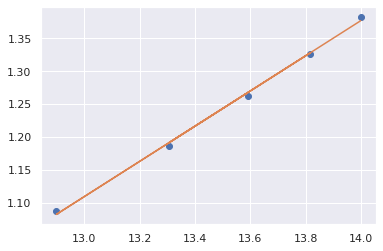

In [40]:
regress = find_exponent(critical)
print("alpha/nu = ", regress[0])


### It is evident that increasing system size gets you closer to the critical point

It flows the relation

$(t(N)-t_c(\infty)) N ^{1/\nu} = const $

$(t(N)-t_c) \sim N ^{-1/\nu}$

$(t(N)-t_c(\infty)) \sim N^{-1/\nu}$

In the limit $N\rightarrow \infty$, $t(N) = t_c(\infty)$

If $1/\nu$ is known then finding $t_c$ is very easy.

In [43]:
def find_tc(X, one_by_nu):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    X=np.array(X)
    
    axs[0].plot(X[:,0], X[:,1], 'o')
    x = X[:,0]**(-one_by_nu)
    y = X[:,1]
    print(X.shape)
    axs[1].plot(x, y, 'o')
    regress = stats.linregress(x, y)
    print(regress)
    y = regress[0] * x + regress[1]
    axs[1].plot(x, y)

(5, 3)
LinregressResult(slope=-1.0073535927570163, intercept=0.9996316882753018, rvalue=-0.9998077748663855, pvalue=3.1991646466278476e-06, stderr=0.01140522913046619)


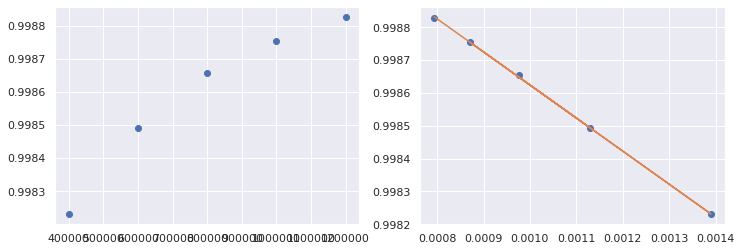

In [44]:
# one_by_nu = 0.5037072777685714
one_by_nu = 0.51
# one_by_nu = 0.5094789034354745
find_tc(critical, one_by_nu)

In [19]:
tc = 0.9913939600114202

#### Data Collapse

Read exponents from a file 
so that I don't have to type it every time

In [47]:

tc, one_by_nu, alpha_by_nu, beta_by_nu, gamma_by_nu = load_exponents_from_file()

12
0.999413290734154
0.5184326267429805
0.26804316192742955
0.00014638224440255057
0.5022015571629053


1200000
600000
1000000
400000
800000


(-5, 5)

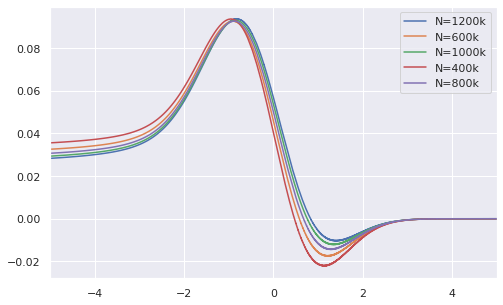

In [48]:
# tc += 0.00005
# one_by_nu -= 0.001

plt.figure(figsize=(8, 5))
for N in data.keys():
#     print(data[N].shape)
    t, H, P = data[N].T
    X = find_specific_heat(t, H, N)
    x=(t-tc)*N**(one_by_nu)
    y=X*N**(-alpha_by_nu)
    plt.plot(x[1:], y, label='N={}k'.format(N//1000))
    pass
plt.legend()
plt.xlim([-5, 5])

In [19]:
tc

0.9985511635765236

In [33]:
tc = 0.997283232056865

In [60]:
1.9828279200228403 / 2

0.9914139600114201

In [79]:
tc

0.99151